In [12]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
import joblib

In [21]:
# Load dataset
df = pd.read_csv(r"F:\Pistachio\dataset\pistachio.csv")

# Separate features (X) and target (y)
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Encode target labels
le = LabelEncoder()
y = le.fit_transform(y)
joblib.dump(le, 'Encode.pkl')

# Feature selection using SelectKBest
selector = SelectKBest(score_func=f_classif, k=10)  # Select top 10 features
X_new = selector.fit_transform(X, y)

# Save selected feature indices for reference
selected_features = selector.get_support(indices=True)
print(f"Selected Features (Indices): {selected_features}")

Selected Features (Indices): [ 0  1  3  4  5  7  9 11 12 14]
[7.310700e+04 1.161807e+03 2.177261e+02 8.705000e-01 3.050946e+02
 7.757900e+04 2.031900e+00 6.896000e-01 6.100000e-03 4.756000e-01]
[8.927200e+04 1.173181e+03 2.519546e+02 8.369000e-01 3.371419e+02
 9.259800e+04 1.826700e+00 7.325000e-01 5.200000e-03 5.366000e-01]
[7.9537000e+04 1.4395129e+03 2.2121360e+02 8.8060000e-01 3.1822890e+02
 8.4281000e+04 2.1102000e+00 6.8170000e-01 5.9000000e-03 4.6480000e-01]
[9.639500e+04 1.352674e+03 2.465945e+02 8.784000e-01 3.503340e+02
 1.009500e+05 2.092000e+00 6.791000e-01 5.400000e-03 4.612000e-01]
[7.406500e+04 1.380550e+03 2.452286e+02 7.963000e-01 3.070871e+02
 8.192000e+04 1.653300e+00 7.574000e-01 5.500000e-03 5.737000e-01]
[7.780300e+04 2.034995e+03 2.703713e+02 8.047000e-01 3.147409e+02
 9.765200e+04 1.684500e+00 6.911000e-01 5.900000e-03 4.776000e-01]
[8.331100e+04 1.208881e+03 2.286437e+02 8.754000e-01 3.256913e+02
 8.600400e+04 2.068800e+00 6.885000e-01 5.700000e-03 4.741000e-01

Predicted Label: ['Siit_Pistachio']
Confusion Matrix:
[[949  49]
 [ 83 637]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.95      0.93       998
           1       0.93      0.88      0.91       720

    accuracy                           0.92      1718
   macro avg       0.92      0.92      0.92      1718
weighted avg       0.92      0.92      0.92      1718



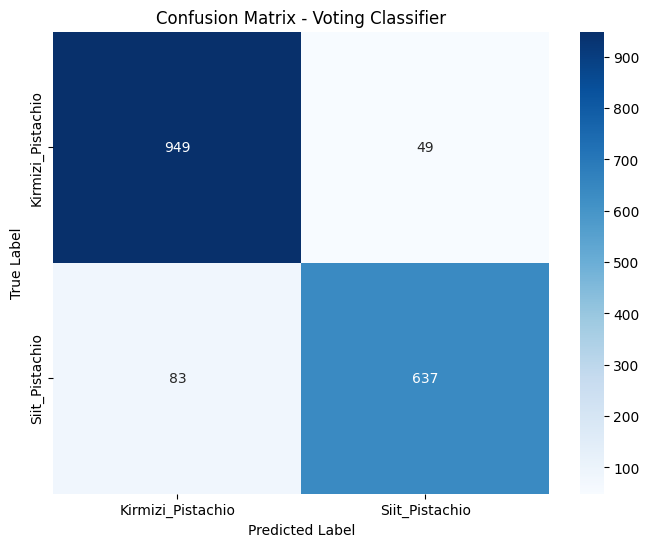

In [17]:
scaler = StandardScaler()
X_new = scaler.fit_transform(X_new)
joblib.dump(scaler, 'scaler.pkl')

# Define individual models
rf = RandomForestClassifier(n_estimators=50, random_state=42)
ada = AdaBoostClassifier(n_estimators=50, random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)

# Create Voting Classifier (Hard Voting)
voting_classifier = VotingClassifier(
    estimators=[('rf', rf), ('ada', ada), ('knn', knn)],
    voting='hard'  # Use 'soft' if models support predict_proba()
)

# Train the ensemble model
voting_classifier.fit(X_new, y)
joblib.dump(voting_classifier, 'Qpistachio_ensemble.pkl')

# Prediction example (using the selected features)
sample = [[60955,999.789,386.9247,209.1255,0.8414,278.5863,0.9465,64400,0.7263,1.8502,0.7663,0.72,0.0063,0.0034,0.5184,0.9591]]
sample_new = scaler.transform(selector.transform(sample))
predicted_label = voting_classifier.predict(sample_new)
print(f"Predicted Label: {le.inverse_transform(predicted_label)}")

# Model Evaluation
y_pred = voting_classifier.predict(X_new)

# Confusion Matrix
cm = confusion_matrix(y, y_pred)
print("Confusion Matrix:")
print(cm)

# Classification Report
print("\nClassification Report:")
print(classification_report(y, y_pred))

# Plot Confusion Matrix as Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt='g', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix - Voting Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()